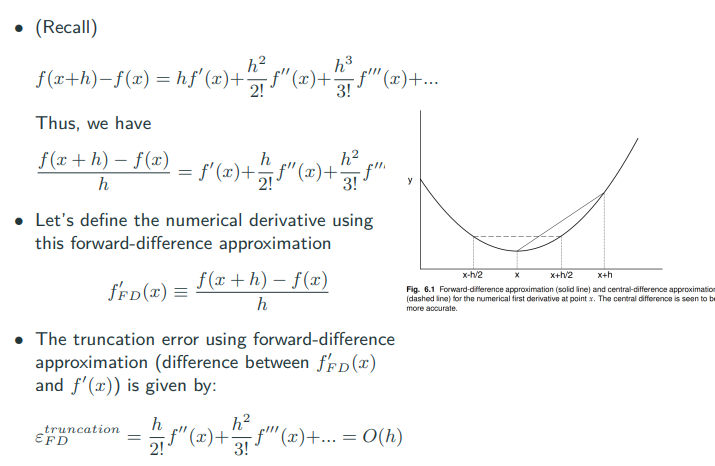

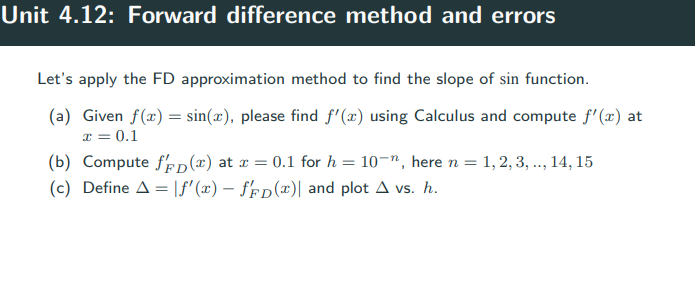

In [3]:


import numpy as np
import matplotlib.pyplot as plt
x_arr = np.linspace(0,10,101)
x_0 = 0.1
f_prime = np.cos(x_0)
print (f_prime)





0.9950041652780258


In [2]:
#x + h
#x 
#f_prime_FD = (f(x+h) - f(x))/h
x_0 = 0.1
h = 1.e-3
f_a = np.sin(x_0)
f_b = np.sin(x_0 + h)

f_prime_FD = (f_b - f_a)/h

print (f_prime_FD)

0.994954082739849


In [5]:
x_0 = 0.1
h = 1.e-5
f_a = np.sin(x_0)
f_b = np.sin(x_0 + h)

f_prime_FD = (f_b - f_a)/h

print (f_prime_FD)

0.9950036660946736


In [6]:
#--- FD method
def FD_Diff(h,x_0):
    f_a = np.sin(x_0)
    f_b = np.sin(x_0 + h)
    ans = 1./h * (f_b - f_a)
    return ans

n_arr = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
h_arr = 10.** np.array(-n_arr) 
f_prime_FD = FD_Diff(h_arr,0.1)
print (f_prime_FD)

[0.98835914 0.99448842 0.99495408 0.99499917 0.99500367 0.99500412
 0.99500416 0.99500417 0.99500416 0.99500408 0.99500408 0.99500963
 0.99503739 0.99642516 0.99920072]


Text(0, 0.5, "$f'_{FD}$")

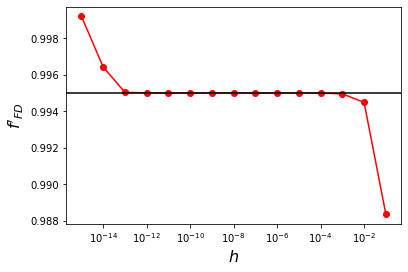

In [12]:
plt.plot(h_arr, f_prime_FD, '-or')
plt.xlabel(r"$h$", fontsize = 16)
plt.xscale('log')
f_prime = np.cos(x_0)
plt.axhline(y=f_prime, color='k', linestyle='-')
plt.xlabel(r"$h$", fontsize = 16)
plt.ylabel(r"$f'_{FD}$", fontsize = 16)
#plt.ylim(0.98,1)


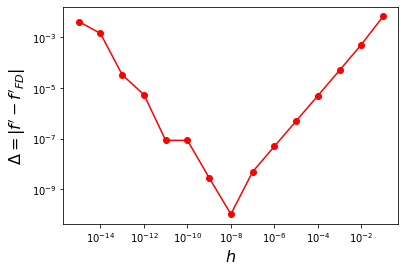

In [16]:
#===
Delta = abs(f_prime_FD - f_prime)
plt.plot(h_arr, Delta, '-or')
plt.xlabel(r"$h$", fontsize = 16)
plt.ylabel(r"$\Delta = |f' - f'_{FD}|$", fontsize = 16)
plt.xscale('log')
plt.yscale('log')


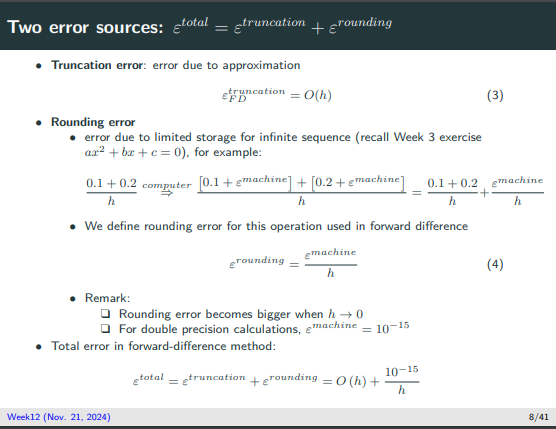

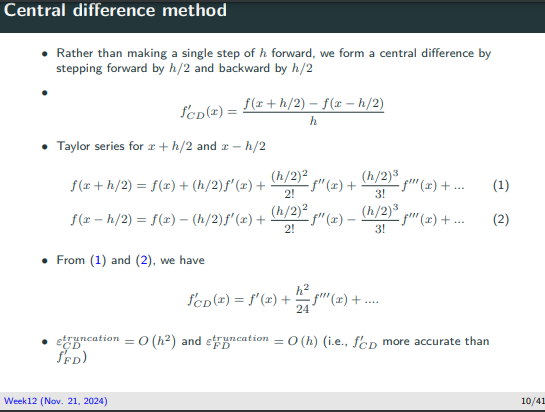

[0.99458963 0.99500002 0.99500412 0.99500416 0.99500417 0.99500417
 0.99500417 0.99500417 0.99500416 0.99500422 0.99500408 0.99500963
 0.99503739 0.99364961 0.99920072]


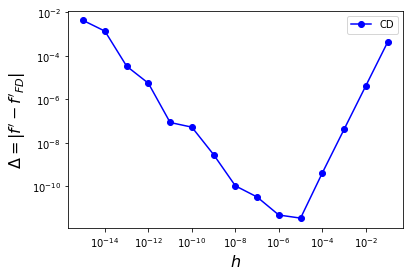

In [21]:



#--- FD method
def CD_Diff(h,x_0):
    f_a = np.sin(x_0 - h/2.)
    f_b = np.sin(x_0 + h/2.)
    ans = 1./h * (f_b - f_a)
    return ans

n_arr = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
h_arr = 10.** np.array(-n_arr) 
f_prime_CD = CD_Diff(h_arr,0.1)
print (f_prime_CD)

#===
Delta = abs(f_prime_CD - f_prime)
plt.plot(h_arr, Delta, '-ob',label = 'CD')
plt.legend()
plt.xlabel(r"$h$", fontsize = 16)
plt.ylabel(r"$\Delta = |f' - f'_{FD}|$", fontsize = 16)
plt.xscale('log')
plt.yscale('log')


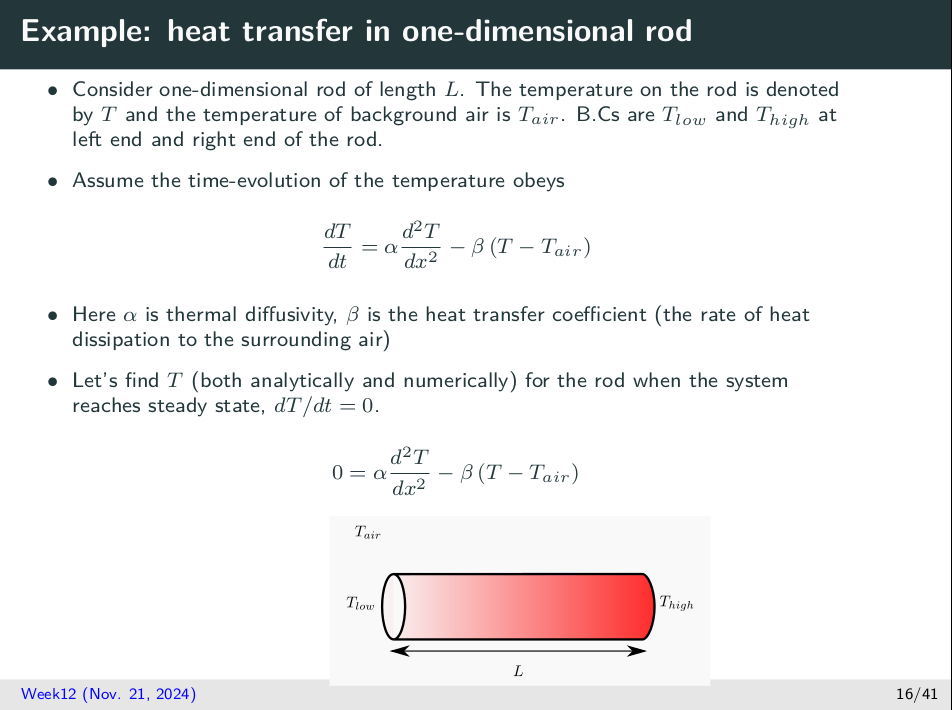

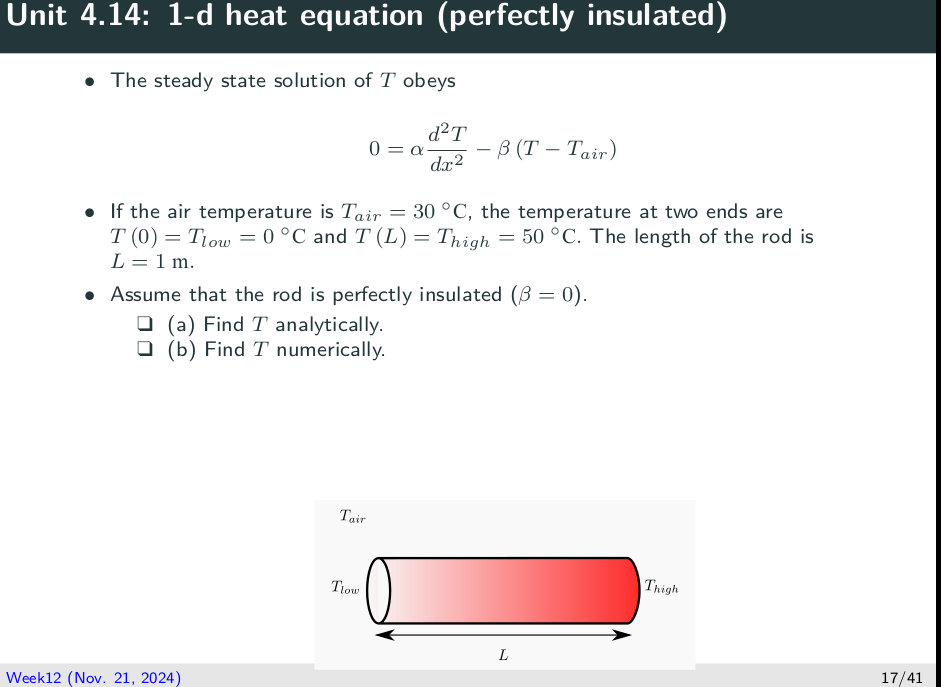